<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marcoteran/deeplearning/blob/master/notebooks/3.4_deeplearning_dataaugmentationandtransferlearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Abrir en Colab" title="Abrir y ejecutar en Google Colaboratory"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/marcoteran/deeplearning/blob/master/notebooks/3.4_deeplearning_dataaugmentationandtransferlearning.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Abrir en Kaggle" title="Abrir y ejecutar en Kaggle"/></a>
  </td>
</table>

### Ejemplo de código
# Sesión 10: *Data Augmentation* y *Transfer Learning*
## Deep Learning y series de tiempo

**Name:** Marco Teran **E-mail:** marco.tulio.teran@gmail.com,
[Website](http://marcoteran.github.io/),
[Github](https://github.com/marcoteran),
[LinkedIn](https://www.linkedin.com/in/marcoteran/).
___

### Importar librerías importantes

Empezamos con las importaciones estándar:

In [3]:
import matplotlib.pyplot as plt

#%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

2.10.1


## Introducción

* **Data Augmentation:** una técnica popular para mitigar el sobreajuste en modelos de redes neuronales. Mejorará el modelo del capítulo anterior, aumentando su precisión del 73.9% al 80.1%.
* **Transfer Learning:** permitirá mejorar aún más el modelo.


Técnicas específicas para mejorar modelos de redes neuronales
- Feature Extraction: utilizando una red preentrenada, se logra una precisión del 90.4%.
- Fine-Tuning: utilizando una red preentrenada, se logra una precisión del 93.1%.

## Data Augmentation

La cantidad de datos disponibles para entrenar el modelo tiene un impacto directo en su capacidad para hacer predicciones precisas.
**Data Augmentation es una técnica que genera más datos de entrenamiento a partir de los datos disponibles.**

- En el caso de imágenes, se aplican transformaciones aleatorias que producen nuevas imágenes de aspecto creíble.
- Data Augmentation ayuda a exponer el modelo a más aspectos de los datos y a generalizar mejor.

### Transformaciones de imágenes

La técnica de Data Augmentation es muy poderosa para datos de tipo imagen.
* Esta técnica consiste en aplicar transformaciones sencillas (rotar, voltear, etc.) a las imágenes para obtener nuevas imágenes plausibles.
* Esto ayuda a exponer el modelo a más aspectos de los datos y a generalizar mejor.

Es importante tener cuidado al elegir las técnicas de aumento de datos utilizadas.
- Se debe tener en cuenta el contexto del conjunto de datos de entrenamiento y el conocimiento del dominio del problema.
- De esta manera, se evita generar imágenes que nunca podrían encontrarse en realidad, lo que empeoraría el entrenamiento.

En **Keras**, se puede realizar fácilmente mediante la configuración de una serie de transformaciones que se realizarán en las imágenes leídas por la instancia de `ImageDataGenerator`.
- Para obtener información detallada sobre las transformaciones disponibles, se puede consultar la API preprocessing de Keras.

Es importante destacar que la transformación se realiza de manera online durante el procesamiento. Esto permite hacer el proceso automático durante el entrenamiento sin necesidad de modificar los datos almacenados en disco. De esta manera, el modelo ve una imagen generada aleatoriamente una sola vez. Sin embargo, también se pueden realizar las transformaciones previamente y añadirlas al conjunto de datos de entrenamiento. Esto aceleraría el preprocesado, pero aumentaría el espacio de almacenamiento y el tiempo de carga de los datos en memoria.

#### Configuración de ImageGenerator

Para aplicar la técnica de Data Augmentation, se deben pasar nuevos argumentos al objeto ImageGenerator de los datos de entrenamiento basándose en el modelo presentado en el capítulo anterior. Algunos de los parámetros que se pueden utilizar son:

```Python
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
```

* `rotation_range` es un valor en grados (0-180) que indica el rango dentrodel cual se pueden rotar imágenes al azar.
* `width_shift` y height_shift son rangos (como una fracción del ancho y la altura total) dentro de los cuales se pueden trasladar las imágenes alazar verticalmente u horizontalmente.
* `shear_range` sirve para aplicar transformaciones de corte al azar.
* `zoom_range` sirve para aplicar zoom aleatorio dentro de las imágenes
* `horizontal_flip` sirve para voltear aleatoriamente la mitad de las imágenes horizontalmente (en nuestro caso de estudio no tiene sentido voltear verticalmente las imágenes).
* `fill_mode` es la estrategia utilizada para rellenar los píxeles reciéncreados que pueden aparecer después de una de las transformaciones anteriores.

Estas son solo algunas de las opciones disponibles de transformación. Todas las restantes se pueden consultar en la página web de la API preprocessing de Keras.

In [ ]:
from google.colab import files
import os
import zipfile

from numpy import expand_dims
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

from tensorflow.keras.preprocessing import image
 
uploaded=files.upload()
for fn in uploaded.keys():
    path='/content/' + fn
    img=image.load_img(path)
    data = img_to_array(img)
    samples = expand_dims(data, 0)
  
    # example of "rotation_range"
    datagen = ImageDataGenerator(rotation_range=45)

    it = datagen.flow(samples, batch_size=1)
    for i in range(6):
        pyplot.subplot(230 + 1 + i)
        batch = it.next()
        image = batch[0].astype('uint8')
        pyplot.imshow(image)
pyplot.show()

Se puede observar cómo se han generado varias imágenes de manera aleatoria a partir de la imagen original utilizando el argumento `rotation_range`.
Se sugiere probar con otros argumentos utilizando este código como referencia.

## Carga de la base de datos

In [ ]:
%%capture
#!wget -O cats_and_dogs_small.zip https://github.com/marcoteran/deeplearning/raw/master/notebooks/cats_and_dogs_small.zip
#!unzip data.zip

In [6]:
base_dir = 'cats_and_dogs_small'

train_dir =      os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir =       os.path.join(base_dir, 'test')

# Directorio con las imagenes de training 
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directorio con las imagenes de validation
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

# Directorio con las imagenes de test
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

A continuación se imprimen en la consola el número total de imágenes que hay en los directorios correspondientes a los conjuntos de entrenamiento, validación y prueba, tanto de gatos como de perros.

In [7]:
print('total training cat images :', len(os.listdir(train_cats_dir ) ))
print('total training dog images :', len(os.listdir(train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

print('total test cat images :', len(os.listdir( test_cats_dir ) ))
print('total test dog images :', len(os.listdir( test_dogs_dir ) ))


total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500
total test cat images : 500
total test dog images : 500


### Aumentación de los datos

* El aumento de datos de imagen se aplica generalmente solo al conjunto de datos de entrenamiento, y no al conjunto de datos de validación o prueba.
* Esto difiere de la preparación de datos, como el cambio de tamaño de la imagen y la escala de píxeles, que se aplica a todos los conjuntos de datos.

Para nuestro caso de estudio, los generadores se pueden especificar de la siguiente forma:

La línea de código importa la clase ImageDataGenerator del módulo tensorflow.keras.preprocessing.image de TensorFlow, que permite crear generadores de datos de imagen para su uso en el entrenamiento de modelos de Deep Learning.

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Se define un objeto ImageDataGenerator que se utiliza para realizar un aumento de datos en las imágenes de entrenamiento para el modelo de Deep Learning, especificando diversas técnicas de transformación de imágenes.

Los valores de los argumentos especifican:
- El rango de rotación permitido (40 grados)
- El rango de desplazamiento horizontal y vertical (0.2)
- La intensidad de la deformación de la imagen (0.2)
- El rango de zoom (0.2), si se aplica o no un volteo horizontal
- El modo de llenado para los píxeles que se añaden después de la rotación o el desplazamiento. 
- El rescale=1./255 normaliza los valores de los píxeles en el rango \[0,1\]

In [2]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [3]:
validation_datagen  = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

Estas líneas de código generan tres grupos de datos de imágenes (entrenamiento, validación y prueba) y los cargan utilizando diferentes transformaciones y configuraciones de procesamiento de imagen.

In [8]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     

validation_generator =  validation_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))


test_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Creación del modelo CNN con DA: Modelo CNN con *Data Augmentation*

Estas líneas de código importan módulos y clases específicas de la biblioteca Keras de TensorFlow para construir y entrenar modelos de redes neuronales convolucionales mediante el uso de capas de convolución, agrupamiento, aplanamiento y densas, así como el optimizador RMSprop.

In [9]:
from tensorflow.keras import Model

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import RMSprop

#### Definición de una red convolucional de más capas

Se define un modelo de red neuronal convolucional (CNN) usando la API Sequential de Keras.
- La red consiste en varias capas convolucionales, capas de pooling, capas completamente conectadas y una capa de salida que utiliza la función de activación sigmoid para clasificar imágenes como pertenecientes a una de dos clases.
- La entrada del modelo es una imagen RGB de 150x150 píxeles y la salida es una probabilidad de pertenencia a la clase positiva.

In [10]:
modelDA = Sequential()
modelDA.add(Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
modelDA.add(MaxPooling2D(2, 2))
modelDA.add(Conv2D(64, (3,3), activation='relu'))
modelDA.add(MaxPooling2D(2,2))
modelDA.add(Conv2D(128, (3,3), activation='relu'))
modelDA.add(MaxPooling2D(2,2))
modelDA.add(Conv2D(128, (3,3), activation='relu'))
modelDA.add(MaxPooling2D(2,2))
modelDA.add(Flatten())
modelDA.add(Dense(512, activation='relu'))
modelDA.add(Dense(1, activation='sigmoid'))

Comprobar la estructura de la red

In [11]:
modelDA.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

### Compilación del modelo

Se compila el modelo de deep learning `modelDA` para entrenar una tarea de clasificación binaria utilizando la función de pérdida `binary_crossentropy`, el optimizador `RMSprop` con una tasa de aprendizaje de $10^{-4}$ y como métrica de evaluación se utiliza la precisión (`acc`).

In [12]:
modelDA.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])

C:\Users\marco\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


## Entrenamiento de la red

Ahora que ya se ha definido la estructura de red, el optimizador, learning rate y metricas ya se puede entrenar la red.

In [13]:
batch_size = 20
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

historyDA = modelDA.fit(
    train_generator,
    steps_per_epoch= steps_per_epoch,
    epochs= 100,
    validation_data= validation_generator,
    validation_steps= validation_steps,
    verbose=2)

Epoch 1/100
100/100 - 22s - loss: 0.6946 - acc: 0.5035 - val_loss: 0.6830 - val_acc: 0.5000 - 22s/epoch - 225ms/step
Epoch 2/100
100/100 - 14s - loss: 0.6794 - acc: 0.5500 - val_loss: 0.6568 - val_acc: 0.5780 - 14s/epoch - 139ms/step
Epoch 3/100
100/100 - 14s - loss: 0.6546 - acc: 0.6015 - val_loss: 0.6593 - val_acc: 0.5860 - 14s/epoch - 138ms/step
Epoch 4/100
100/100 - 14s - loss: 0.6340 - acc: 0.6340 - val_loss: 0.6799 - val_acc: 0.5720 - 14s/epoch - 136ms/step
Epoch 5/100
100/100 - 14s - loss: 0.6276 - acc: 0.6395 - val_loss: 0.6404 - val_acc: 0.6400 - 14s/epoch - 138ms/step
Epoch 6/100
100/100 - 14s - loss: 0.6169 - acc: 0.6555 - val_loss: 0.6337 - val_acc: 0.6190 - 14s/epoch - 143ms/step
Epoch 7/100
100/100 - 14s - loss: 0.6058 - acc: 0.6675 - val_loss: 0.6321 - val_acc: 0.6230 - 14s/epoch - 136ms/step
Epoch 8/100
100/100 - 13s - loss: 0.5925 - acc: 0.6780 - val_loss: 0.6090 - val_acc: 0.6480 - 13s/epoch - 133ms/step
Epoch 9/100
100/100 - 13s - loss: 0.5933 - acc: 0.6790 - val_los

Epoch 71/100
100/100 - 14s - loss: 0.3870 - acc: 0.8235 - val_loss: 0.4672 - val_acc: 0.7960 - 14s/epoch - 136ms/step
Epoch 72/100
100/100 - 14s - loss: 0.3996 - acc: 0.8165 - val_loss: 0.4792 - val_acc: 0.7730 - 14s/epoch - 137ms/step
Epoch 73/100
100/100 - 13s - loss: 0.3886 - acc: 0.8275 - val_loss: 0.4907 - val_acc: 0.7530 - 13s/epoch - 135ms/step
Epoch 74/100
100/100 - 13s - loss: 0.3902 - acc: 0.8185 - val_loss: 0.5068 - val_acc: 0.7580 - 13s/epoch - 135ms/step
Epoch 75/100
100/100 - 13s - loss: 0.3983 - acc: 0.8210 - val_loss: 0.4300 - val_acc: 0.8050 - 13s/epoch - 132ms/step
Epoch 76/100
100/100 - 13s - loss: 0.3907 - acc: 0.8200 - val_loss: 0.4750 - val_acc: 0.7790 - 13s/epoch - 132ms/step
Epoch 77/100
100/100 - 13s - loss: 0.3864 - acc: 0.8270 - val_loss: 0.5242 - val_acc: 0.7550 - 13s/epoch - 133ms/step
Epoch 78/100
100/100 - 13s - loss: 0.3874 - acc: 0.8285 - val_loss: 0.4240 - val_acc: 0.8070 - 13s/epoch - 132ms/step
Epoch 79/100
100/100 - 13s - loss: 0.3916 - acc: 0.8250 

### Evaluación de la red

Para ver si la red ha aprendido a clasificar bien los números manuscritos hay que comprobar la precisión que obtiene en el conjunto de datos de test. Para este conjunto no ha sido entrenada la red.

In [14]:
print (steps_per_epoch)
print (validation_steps)
test_lost, test_acc= modelDA.evaluate(test_generator)
print ("Test Accuracy:", test_acc)

100
50
50/50 [==============================] - 2s 42ms/step - loss: 0.4473 - acc: 0.8030
Test Accuracy: 0.8029999732971191


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 640x480 with 0 Axes>

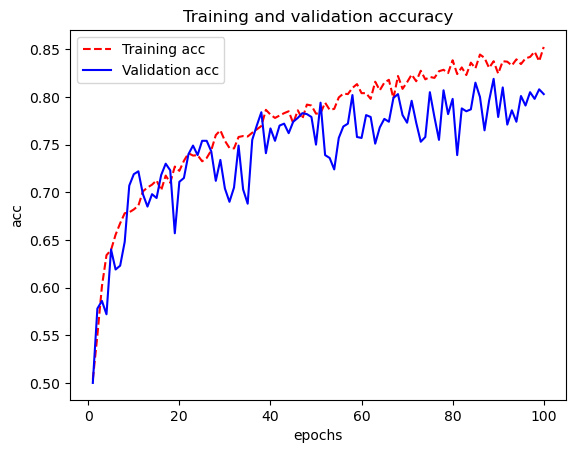

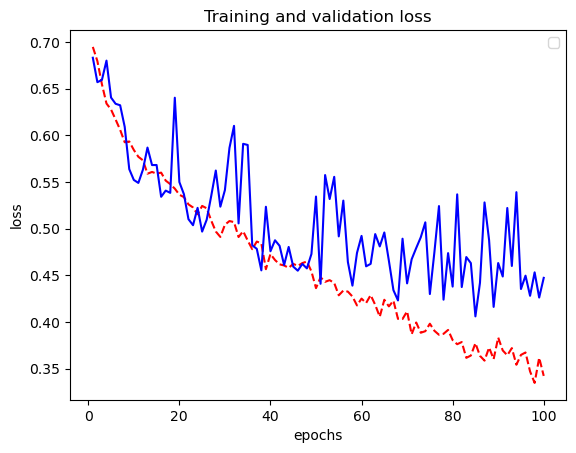

<Figure size 640x480 with 0 Axes>

In [15]:
acc      = historyDA.history['acc' ]
val_acc  = historyDA.history['val_acc']
loss     = historyDA.history['loss' ]
val_loss = historyDA.history['val_loss']

epochs    = range(1,len(acc)+1,1) # obtener número de epochs

plt.plot  ( epochs,     acc, 'r--', label='Training acc'  )
plt.plot  ( epochs, val_acc,  'b', label='Validation acc')
plt.title ('Training and validation accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')

plt.legend()
plt.figure()


plt.plot  ( epochs,     loss, 'r--' )
plt.plot  ( epochs, val_loss ,  'b' )
plt.title ('Training and validation loss'   )
plt.ylabel('loss')
plt.xlabel('epochs')

plt.legend()
plt.figure()



* La técnica se basa en mezclar información existente, lo que puede no ser suficiente para eliminar por completo el sobreajuste en algunos casos.
* Para mitigar el sobreentrenamiento, se pueden añadir técnicas como la regularización o Dropout.
* Sin embargo, en algunos casos, aún no es suficiente obtener mejores modelos debido a la falta de datos.
* Por lo tanto, se presenta otra oportunidad en la siguiente sección: usar modelos preentrenados

En resumen, se observó cómo **Data Augmentation** es una técnica útil para reducir el overfitting en modelos de imágenes. Sin embargo, hay *limitaciones* en la capacidad de descubrir nuevas características de los datos.
Esto se debe a que, al tener un conjunto de datos de entrenamiento pequeño, la técnica de **Data Augmentation** solo puede mezclar la información existente y no generar información nueva.

___

# Transfer Learning

**Transfer Learning** es una técnica central en Deep Learning que permite entrenar una red neuronal a partir de una red preentrenada en lugar de entrenarla desde cero.
- Esta técnica se utiliza para reducir el tiempo y el costo requeridos para entrenar una red neuronal desde cero, ya que utiliza los parámetros de una red preentrenada como punto de partida para entrenar el modelo.

Las **características aprendidas** por la red preentrenada pueden ser útiles para muchos problemas diferentes de visión por computadora, a pesar de que estos nuevos problemas pueden involucrar clases completamente diferentes a las de la tarea original.

Existen dos formas de utilizar una red preentrenada:

- **Feature Extraction:** se utiliza la red preentrenada como un extractor de características para un nuevo conjunto de datos.
- **Fine-Tuning:** se ajustan los parámetros de la red preentrenada para que se adapte a un nuevo conjunto de datos.

En una red neuronal convolucional, las primeras capas son las encargadas de aprender características más genéricas, y estas características aprendidas pueden ser fácilmente reutilizadas en otros problemas.

La portabilidad de las características aprendidas a través de diferentes problemas es una de las virtudes clave del Transfer Learning en Deep Learning, y su utilización puede crear modelos de visión potentes con muy pocos datos.

### Feature Extraction

El **Feature Extraction** es una técnica utilizada para extraer características relevantes de nuevos datos, utilizando los parámetros aprendidos por una red preentrenada. Estas características se procesan a través de un nuevo clasificador que se entrena desde cero.

Las **ConvNet* utilizadas para clasificar imágenes se componen de dos partes:
1. Una serie de capas de convoluciones y pooling
2. Un clasificador formado habitualmente por una o varias capas densas.

La primera parte se llama base convolucional del modelo.
La extracción de características consiste en tomar la base convolucional de una red previamente entrenada, ejecutar los nuevos datos a través de ella y entrenar a un nuevo clasificador en la parte de la salida.

La **reutilización de la base convolucional** es útil ya que las características aprendidas por la red preentrenada son portables a otros problemas del mismo ámbito.

Las representaciones encontradas en capas densamente conectadas ya no mantienen información sobre dónde se encuentran los objetos en la imagen de entrada, a diferencia de las capas convolucionales.

La **API de Keras** permite aplicar esta técnica de manera fácil y con pocas líneas de código.
* **Keras** permite descargar un modelo y luego configurar cómo este debe ser entrenado, indicando qué capas son entrenables (**Trainable layers**) y qué capas no (**Frozen layers**).
* En el caso de visión por computador, muchos modelos preentrenados con **ImageNet** están disponibles en la mayoría de librerías de desarrollo de Deep Learning, como es el caso de Keras.

En concreto en la página de modelos preentrenados ``tf.keras.applications`` podemos encontrar disponibles los siguientes modelos para clasificación de imágenes entrenados con **ImageNet**:
* Xception
* VGG16
* VGG19
* ResNet50
* InceptionV3
* InceptionResNetV2
* MobileNet
* MobileNetV2
* DenseNet
* NASNet

###  VGG16: Modelo con *Feature Extraction*

Se utilizará la red neuronal **VGG16** con arquitectura convolucional para resolver el problema de clasificación de perros contra gatos. Algunas características de esta red neuronal son:

* **VGG16** ha sido entrenada previamente en el conjunto de datos **ImageNet**, que contiene 1.4 millones de imágenes en 1000 clases diferentes.
* **ImageNet** incluye diversas clases de animales, incluyendo diferentes especies de gatos y perros, lo que sugiere que VGG16 debería tener un buen rendimiento en este problema de clasificación.
* La red neuronal VGG16 fue propuesta por *Karen Simonyan* y *Andrew Zisserman* en su artículo *"Very Deep Convolutional Networks for Large-Scale Image Recognition"*.
* VGG16 es una red neuronal de **16 capas** que utiliza convoluciones para extraer características de las imágenes.

El modelo VGG16 podemos importarlo desde el módulo ``keras.applications``

In [4]:
from tensorflow.keras.applications import VGG16

A este constructor de la red VGG16 se le pasan tres argumentos.
1. La forma de los tensores de imágenes que alimentarán a la red (es un argumento opcional).
2. El argumento `include_top` indica si se debe incluir (o no) el clasificador en la última capa de la red. 
    * Este caso, esta capa corresponde a la capa que clasifica las 1000 clases de ImageNet. Debido a que tenemos la intención de usar nuestro propio clasificador (que clasifica solo dos clases: gato y perro) no necesitamos incluirla.
3. El último argumento, `weights`, indica de dónde se obtiene la información para iniciar los pesos de los parámetros de la red (en nuestro caso usaremos ImageNet)

In [5]:
pre_trained_model = VGG16(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = 'imagenet')

58889256/58889256 [==============================] - 19s 0us/step


Con el método ``summary()`` podemos saber el detalle de la arquitectura de la base convolucional VGG16:

In [18]:
pre_trained_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

La red neuronal **VGG16** no incluye las dos capas finales fully-connected de 4096 neuronas ni la de 1000 neuronas (cada una representa una categoría de imágenes de ImageNet) si se establece el valor **`False`** del argumento `include_top`.
* No se requieren estas capas porque se crearán unas propias para construir un clasificador.
* El clasificador se usará para predecir si las imágenes son un perro o un gato.
* El último feature map de forma y tamaño (4, 4, 512) que devuelve la base convolucional VGG16 será la entrada para el clasificador.

**Importante:** Antes de entrenar el modelo es necesario indicar cual de las capas de la base convolucional **no deben ser entrenadas**, lo que se denomina «congelar» capas (Freeze layers).

Congelar una capa o un conjunto de capas significa evitar que sus pesos se actualicen durante el entrenamiento.
* Si no se hiciera esto, los valores que fueron previamente aprendidos por la base convolucional serían modificados durante el entrenamiento, efecto que no se busca.
* En Keras, congelar una capa se realiza estableciendo su atributo trainable a False

Se recorren todas las capas de la red pre-entrenada (pre_trained_model) y se establece el atributo `trainable` de cada capa en **`False`**.

In [6]:
for layer in pre_trained_model.layers:
    layer.trainable = False

Al establecer este atributo en False, se evita que los pesos de las capas se actualicen durante el entrenamiento del modelo en el nuevo conjunto de datos. En cambio, se conservan los pesos previamente aprendidos por la red pre-entrenada.

In [19]:
pre_trained_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

En Keras los modelos los podemos considerar como capas y, por tanto, podemos agregar un modelo (como `pre_trained_model`) a un modelo secuencial al igual que agregaríamos una capa:

In [20]:
from tensorflow.keras import Model

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

Se define una red neuronal llamada `modelFE` que utiliza transferencia de aprendizaje para extraer características útiles de las imágenes de entrada utilizando una red neuronal pre-entrenada `pre_trained_model` y luego entrena una capa clasificadora adicional en la parte superior para clasificar las imágenes en dos clases.

In [21]:
modelFE = Sequential()
modelFE.add(pre_trained_model)
modelFE.add(Flatten())
modelFE.add(Dense(256, activation='relu'))
modelFE.add(Dense(1, activation='sigmoid'))

- `modelFE.add(Dense(256, activation='relu'))` agrega una capa densa de 256 neuronas con función de activación ReLU, que tiene la tarea de aprender a clasificar las características extraídas de la imagen de entrada en clases.

- `modelFE.add(Dense(1, activation='sigmoid'))` agrega una capa densa de una sola neurona con función de activación sigmoidal que se encarga de generar la salida de la red. La salida es un número entre 0 y 1 que representa la probabilidad de que la imagen de entrada pertenezca a la clase positiva.

Así es como el método `summary()` presenta la red neuronal que se acaba de construir:

In [22]:
modelFE.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               2097408   
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


Realizamos el preprocesado de **Data Augmentation**. El siguiente código genera tres objetos `ImageDataGenerator` para aumentar y escalar las imágenes de entrenamiento, validación y prueba, respectivamente.

Luego, utiliza el método `flow_from_directory` para cargar las imágenes de cada conjunto y aplicar las transformaciones definidas en los ImageDataGenerators.

In [23]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen  = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )


train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     

validation_generator =  validation_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

test_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Se compila red utilizando los mismos parametros anteriores

In [24]:
from tensorflow.keras.optimizers import RMSprop

modelFE.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])

Se comienza a entrenar el modelo con el método ``fit()``, con la misma configuración de Data Augmentation que utilizamos en la sección anterior.

Pero no es necesariamente siempre la mejor opción; la mejor combinación de técnicas depende del tipo y cantidad de datos disponibles.

In [25]:
batch_size = 20
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

historyFE = modelFE.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = steps_per_epoch,
            epochs = 100,
            validation_steps = validation_steps,
            verbose = 2)

Epoch 1/100
100/100 - 15s - loss: 0.5444 - acc: 0.7125 - val_loss: 0.3258 - val_acc: 0.8520 - 15s/epoch - 150ms/step
Epoch 2/100
100/100 - 13s - loss: 0.4225 - acc: 0.8120 - val_loss: 0.2831 - val_acc: 0.8870 - 13s/epoch - 135ms/step
Epoch 3/100
100/100 - 13s - loss: 0.3925 - acc: 0.8170 - val_loss: 0.2586 - val_acc: 0.8910 - 13s/epoch - 133ms/step
Epoch 4/100
100/100 - 13s - loss: 0.3777 - acc: 0.8300 - val_loss: 0.2631 - val_acc: 0.8790 - 13s/epoch - 134ms/step
Epoch 5/100
100/100 - 13s - loss: 0.3646 - acc: 0.8320 - val_loss: 0.2501 - val_acc: 0.8910 - 13s/epoch - 134ms/step
Epoch 6/100
100/100 - 13s - loss: 0.3518 - acc: 0.8480 - val_loss: 0.2583 - val_acc: 0.8920 - 13s/epoch - 133ms/step
Epoch 7/100
100/100 - 13s - loss: 0.3247 - acc: 0.8480 - val_loss: 0.2505 - val_acc: 0.8960 - 13s/epoch - 133ms/step
Epoch 8/100
100/100 - 13s - loss: 0.3191 - acc: 0.8580 - val_loss: 0.2692 - val_acc: 0.8880 - 13s/epoch - 135ms/step
Epoch 9/100
100/100 - 13s - loss: 0.3228 - acc: 0.8525 - val_los

Epoch 71/100
100/100 - 14s - loss: 0.1860 - acc: 0.9300 - val_loss: 0.2749 - val_acc: 0.9070 - 14s/epoch - 142ms/step
Epoch 72/100
100/100 - 14s - loss: 0.1947 - acc: 0.9155 - val_loss: 0.2781 - val_acc: 0.9100 - 14s/epoch - 140ms/step
Epoch 73/100
100/100 - 14s - loss: 0.1974 - acc: 0.9155 - val_loss: 0.2756 - val_acc: 0.9080 - 14s/epoch - 142ms/step
Epoch 74/100
100/100 - 14s - loss: 0.1816 - acc: 0.9230 - val_loss: 0.2686 - val_acc: 0.9150 - 14s/epoch - 144ms/step
Epoch 75/100
100/100 - 15s - loss: 0.1999 - acc: 0.9150 - val_loss: 0.2736 - val_acc: 0.9170 - 15s/epoch - 148ms/step
Epoch 76/100
100/100 - 15s - loss: 0.1975 - acc: 0.9175 - val_loss: 0.2765 - val_acc: 0.9030 - 15s/epoch - 147ms/step
Epoch 77/100
100/100 - 14s - loss: 0.1862 - acc: 0.9205 - val_loss: 0.2713 - val_acc: 0.9110 - 14s/epoch - 144ms/step
Epoch 78/100
100/100 - 14s - loss: 0.1724 - acc: 0.9330 - val_loss: 0.2811 - val_acc: 0.9060 - 14s/epoch - 144ms/step
Epoch 79/100
100/100 - 14s - loss: 0.1901 - acc: 0.9235 

Comprobar la precisión con los datos de prueba

In [26]:
test_lost, test_acc= modelFE.evaluate(test_generator)
print ("Test Accuracy:", test_acc)

50/50 [==============================] - 2s 44ms/step - loss: 0.2953 - acc: 0.9060
Test Accuracy: 0.906000018119812


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 640x480 with 0 Axes>

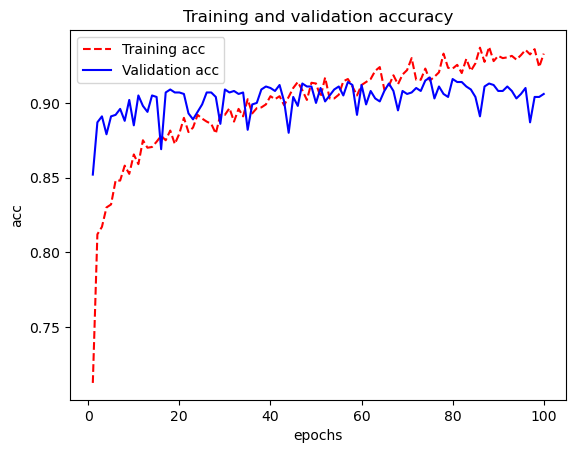

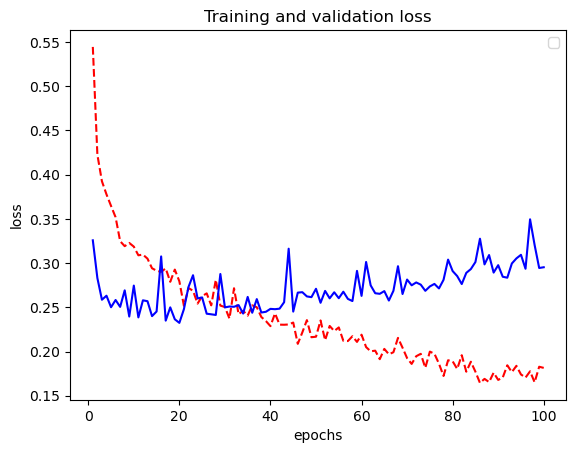

<Figure size 640x480 with 0 Axes>

In [27]:
acc      = historyFE.history['acc']
val_acc  = historyFE.history[ 'val_acc']
loss     = historyFE.history['loss']
val_loss = historyFE.history['val_loss']

epochs    = range(1,len(acc)+1,1) # obtener número de epochs

plt.plot  ( epochs,     acc, 'r--', label='Training acc'  )
plt.plot  ( epochs, val_acc,  'b', label='Validation acc')
plt.title ('Training and validation accuracy')
plt.ylabel('acc')
#plt.ylim(0,1)
plt.xlabel('epochs')

plt.legend()
plt.figure()


plt.plot  ( epochs,     loss, 'r--' )
plt.plot  ( epochs, val_loss ,  'b' )
plt.title ('Training and validation loss'   )
plt.ylabel('loss')
plt.xlabel('epochs')
#plt.ylim(0,1)

plt.legend()
plt.figure()

## Fine-Tuning

La técnica de **Fine-Tuning** es complementaria a la **Feature Extraction** y se utiliza ampliamente en la reutilización de modelos.
Consiste en hacer un *ajuste más fino* y entrenar algunas de las capas finales de la *base convolucional* del modelo usado para la extracción de características, junto con la parte agregada del clasificador.

El *ajuste fino* de las representaciones más abstractas del modelo se realiza en **Fine-Tuning**.

El nivel de generalización y, por lo tanto, de reutilización de las representaciones extraídas por capas de convolución específicas depende de la posición de la capa en el modelo.
* Las primeras capas aprenden características generales y, después, gradualmente en capas sucesivas se van aprendiendo características más concretas del dominio de problema que estamos tratando.
* Las capas del modelo que están más próximas a la capa de entrada de datos extraen mapas de características locales altamente genéricas, mientras que las capas que están más cerca del clasificador final extraen conceptos más abstractos.

La base convolucional VGG16 se compone de 5 bloques: *block1, block2, block3, block4, block5.*

Para mostrar la técnica de Fine-Tuning se entrenará el *block5* de VGG16 compuesto por tres capas convolucionales y una de pooling *(block5_conv1, block5_conv2 y block5_conv3 serán ahora entrenables)*.

### VGG16 : Modelo con *Fine Tuning*

El código en Keras que permite especificar este comportamiento en la fase de entrenamiento que acabamos de describir puede ser el siguiente:

In [28]:
from tensorflow.keras.applications import VGG16

pre_trained_model = VGG16(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = 'imagenet')

pre_trained_model.trainable = True

set_trainable = False


for layer in pre_trained_model.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable: 
        layer.trainable = True
    else:
        layer.trainable = False

pre_trained_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

Definamos igual que antes la red:

In [29]:
modelFT = Sequential()
modelFT.add(pre_trained_model)
modelFT.add(Flatten())
modelFT.add(Dense(256, activation='relu'))
modelFT.add(Dense(1, activation='sigmoid'))

Ahora el pre_trained_model tendrá más capas a entrenar, como podemos ver con la salida del método summary()

In [30]:
modelFT.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               2097408   
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 9,177,089
Non-trainable params: 7,635,264
_________________________________________________________________


#### Compilación y entrenamiento de la red

Se usarán los mismos hiperparámetros (optimizador RMSProp con learning rate de 1e-4), pero es importante dejar claro, para aquellos que quieran profundizar más en el tema, que estos hiperparámetros juegan un papel fundamental.
* En general es una buena práctica usar un learning rate muy pequeño para limitar la magnitud de las modificaciones que se realizan en las tres capas del *block5* que está ajustando.
* Los **learning rate** que son demasiado grandes pueden dañar los pesos previos que venían de la red preentrenada, ya que mantenían información importante para representar a las características.

In [31]:
from tensorflow.keras.optimizers import RMSprop

modelFT.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4), 
              metrics=['acc'])

Generación del conjunto de datos aumentados

In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen  = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )


train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     

validation_generator =  validation_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))


test_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Entrenamiento del modelo

In [33]:
batch_size = 20
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

historyFT = modelFT.fit(
    train_generator,
    validation_data = validation_generator,
    steps_per_epoch = steps_per_epoch,
    epochs = 100,
    validation_steps = validation_steps,
    verbose = 2)

Epoch 1/100
100/100 - 15s - loss: 0.5224 - acc: 0.7475 - val_loss: 0.2829 - val_acc: 0.8650 - 15s/epoch - 146ms/step
Epoch 2/100
100/100 - 14s - loss: 0.3414 - acc: 0.8475 - val_loss: 0.2349 - val_acc: 0.9040 - 14s/epoch - 136ms/step
Epoch 3/100
100/100 - 14s - loss: 0.2845 - acc: 0.8795 - val_loss: 0.2038 - val_acc: 0.9140 - 14s/epoch - 138ms/step
Epoch 4/100
100/100 - 14s - loss: 0.2617 - acc: 0.8935 - val_loss: 0.2388 - val_acc: 0.9010 - 14s/epoch - 139ms/step
Epoch 5/100
100/100 - 14s - loss: 0.2431 - acc: 0.9085 - val_loss: 0.2679 - val_acc: 0.9030 - 14s/epoch - 138ms/step
Epoch 6/100
100/100 - 15s - loss: 0.2567 - acc: 0.8940 - val_loss: 0.1779 - val_acc: 0.9310 - 15s/epoch - 154ms/step
Epoch 7/100
100/100 - 14s - loss: 0.1935 - acc: 0.9210 - val_loss: 0.1542 - val_acc: 0.9400 - 14s/epoch - 143ms/step
Epoch 8/100
100/100 - 14s - loss: 0.1861 - acc: 0.9245 - val_loss: 0.1557 - val_acc: 0.9310 - 14s/epoch - 138ms/step
Epoch 9/100
100/100 - 14s - loss: 0.1989 - acc: 0.9220 - val_los

Epoch 71/100
100/100 - 15s - loss: 0.0647 - acc: 0.9845 - val_loss: 0.9261 - val_acc: 0.9440 - 15s/epoch - 152ms/step
Epoch 72/100
100/100 - 15s - loss: 0.1199 - acc: 0.9750 - val_loss: 0.8657 - val_acc: 0.9390 - 15s/epoch - 145ms/step
Epoch 73/100
100/100 - 15s - loss: 0.0676 - acc: 0.9825 - val_loss: 0.9255 - val_acc: 0.9380 - 15s/epoch - 145ms/step
Epoch 74/100
100/100 - 15s - loss: 0.0749 - acc: 0.9810 - val_loss: 2.3126 - val_acc: 0.9370 - 15s/epoch - 151ms/step
Epoch 75/100
100/100 - 14s - loss: 0.0937 - acc: 0.9760 - val_loss: 1.8147 - val_acc: 0.9340 - 14s/epoch - 145ms/step
Epoch 76/100
100/100 - 14s - loss: 0.0874 - acc: 0.9820 - val_loss: 0.5635 - val_acc: 0.9310 - 14s/epoch - 145ms/step
Epoch 77/100
100/100 - 15s - loss: 0.1092 - acc: 0.9785 - val_loss: 0.7036 - val_acc: 0.9390 - 15s/epoch - 150ms/step
Epoch 78/100
100/100 - 15s - loss: 0.1245 - acc: 0.9770 - val_loss: 0.2995 - val_acc: 0.9340 - 15s/epoch - 145ms/step
Epoch 79/100
100/100 - 15s - loss: 0.0653 - acc: 0.9795 

Igual que en los anteriores modelos, se verifica gráficamente cómo evoluciona el entrenamiento en las gráficas

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 640x480 with 0 Axes>

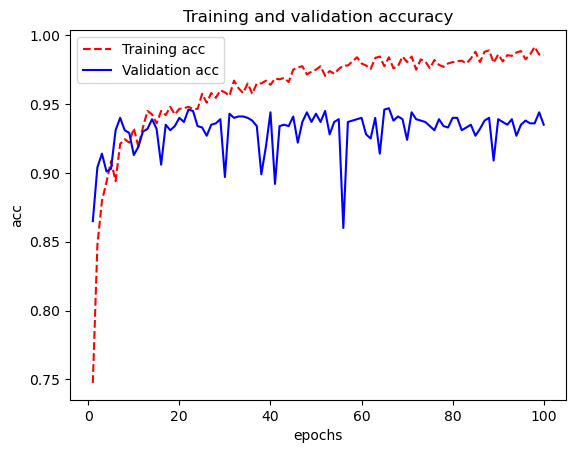

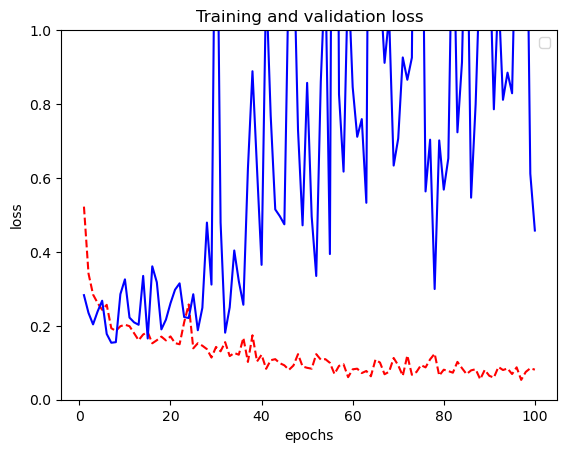

<Figure size 640x480 with 0 Axes>

In [34]:
import matplotlib.pyplot as plt

acc      = historyFT.history['acc']
val_acc  = historyFT.history['val_acc']
loss     = historyFT.history['loss']
val_loss = historyFT.history['val_loss']

epochs    = range(1,len(acc)+1,1) # obtener número de epochs

plt.plot  ( epochs,     acc, 'r--', label='Training acc'  )
plt.plot  ( epochs, val_acc,  'b', label='Validation acc')
plt.title ('Training and validation accuracy')
plt.ylabel('acc')
#plt.ylim(0,1)
plt.xlabel('epochs')

plt.legend()
plt.figure()


plt.plot  ( epochs,     loss, 'r--' )
plt.plot  ( epochs, val_loss ,  'b' )
plt.title ('Training and validation loss'   )
plt.ylabel('loss')
plt.xlabel('epochs')
plt.ylim(0,1)

plt.legend()
plt.figure()

Con los datos de pruebapara confirmar la mejora observada ya en el historial de entrenamiento

In [35]:
test_lost, test_acc= modelFT.evaluate(test_generator)
print ("Test Accuracy:", test_acc)

50/50 [==============================] - 2s 47ms/step - loss: 0.4577 - acc: 0.9350
Test Accuracy: 0.9350000023841858


<Figure size 640x480 with 0 Axes>

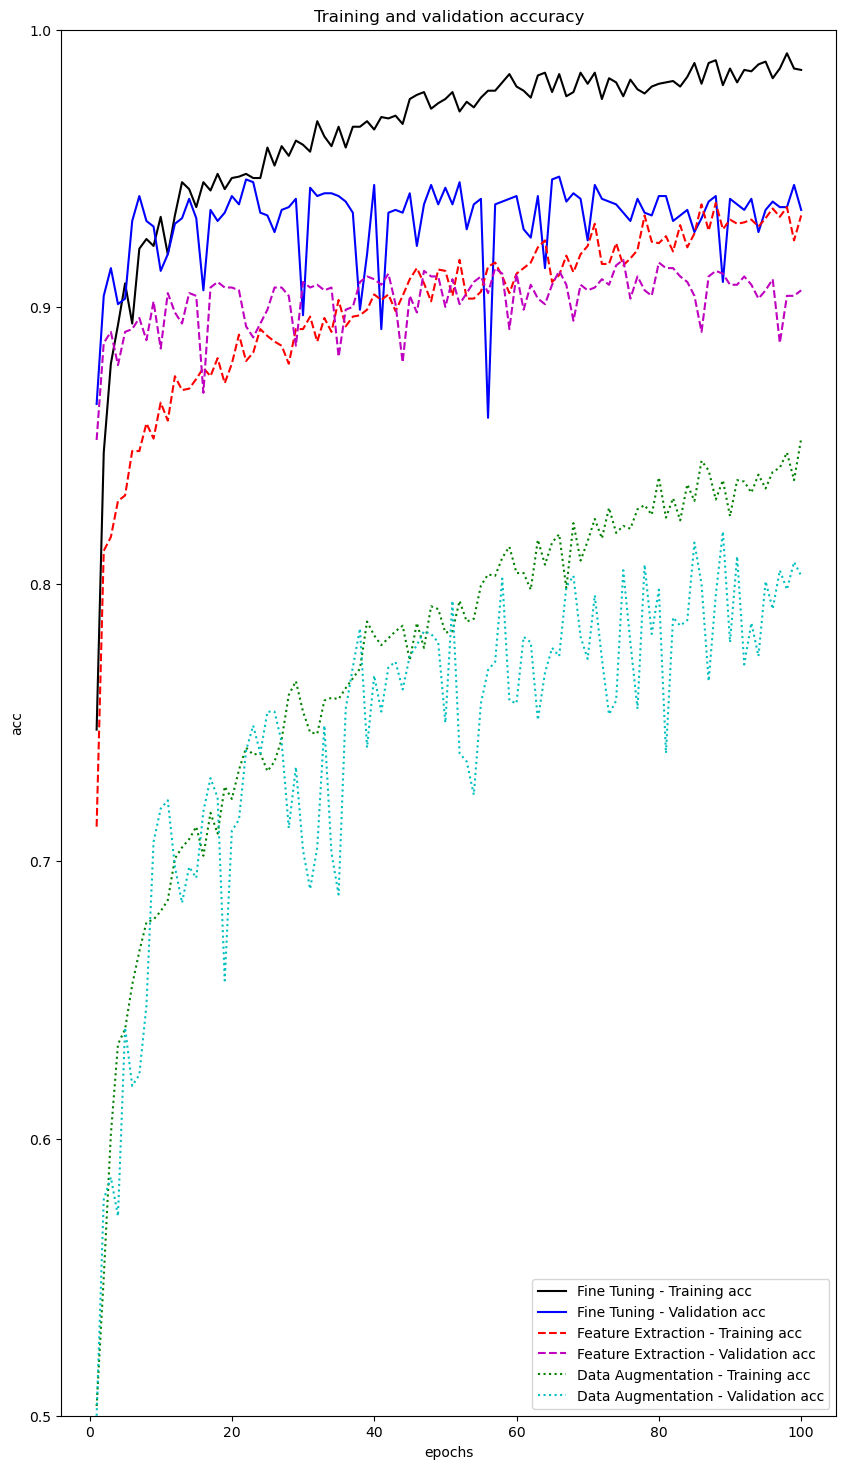

<Figure size 640x480 with 0 Axes>

In [36]:
accDA      = historyDA.history['acc']
val_accDA  = historyDA.history['val_acc']

accFE      = historyFE.history['acc']
val_accFE  = historyFE.history['val_acc']

accFT      = historyFT.history['acc']
val_accFT  = historyFT.history['val_acc']

epochs    = range(1,len(accDA)+1,1) 

plt.figure(figsize=(10,18))

plt.plot(epochs, accFT,'k', label='Fine Tuning - Training acc')
plt.plot(epochs, val_accFT,'b', label='Fine Tuning - Validation acc')

plt.plot(epochs, accFE, 'r--', label='Feature Extraction - Training acc')
plt.plot(epochs, val_accFE,  'm--', label='Feature Extraction - Validation acc')

plt.plot(epochs, accDA, 'g:', label='Data Augmentation - Training acc')
plt.plot(epochs, val_accDA,  'c:', label='Data Augmentation - Validation acc')

plt.title ('Training and validation accuracy')
plt.ylabel('acc')
plt.ylim(0.5,1)
plt.xlabel('epochs')


plt.legend()
plt.figure()

Prueba con fotografías propias

In [ ]:
import numpy as np

from google.colab import files
from tensorflow.keras.preprocessing import image

uploaded=files.upload()
file=list(uploaded.keys())[0]

path='/content/' + file
img=image.load_img(path, target_size=(150, 150))

x=image.img_to_array(img)
image=np.expand_dims(x, axis=0)  

classes = modelFT.predict(image)
print(classes)

plt.imshow(img)
plt.show()

if classes>0: print( fn + " es un PERRO")
else: print( fn + " es un GATO")

___
¡Todo bien! ¡Es todo por hoy! 😀